# License Status Prediction - Multiclass Classification
<hr style="border:1px solid gray"> </hr>

Approach

```

Data Description

Exploratory Data Analysis

Data Cleaning

    Missing Value imputation

    Outlier Detection

Data Imbalance

Data Encoding

Model Building

    KNN classifier

    Naive Bayes algorithm

    Logistic Regression

    Decision Tree classifier

Classification Metrics

    Precision

    Recall

    F1 score

    Accuracy

    Macro average

    Weighted average

Feature importance
```

## Contents.

    1. Problem Description
    2. Data Exploration
    3. Feature Selection
    4. KNN Algorithm
    5. Naive Bias
    5. Logistic Regression
    6. Decisoin Tree
    
--------------------------------------------------------------------------------------------------------------------------------


### Problem Description

We are given a license dataset which holds various information related the business license , The objective of out problem is to predict license Status for the given business. Lets start with delving deep into the data.
________________________________________________________________________________________________________________________________

In [ ]:
# !pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import category_encoders as ce

import seaborn as sns

In [ ]:
# read the df
df = pd.read_csv("/content/drive/MyDrive/License_Data.csv")

# print the shape of the dataframe
print(df.shape)

# show the top few rows
display(df.head().T)

(85895, 32)


<ipython-input-5-bc0b30da8cbf>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/License_Data.csv")


,0,1,2,3,4
ID,35342-20020816,1358463-20051116,1980233-20090722,1476582-20040211,1141408-20080516
LICENSE ID,1256593,1639294,1980233,1476582,1896750
ACCOUNT NUMBER,32811,262311,345008,273121,213785
SITE NUMBER,1,29,1,1,1
LEGAL NAME,CARMEN CAHUE,"ISLA TROPICAL, INC.",DJS REMODELING,ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
DOING BUSINESS AS NAME,CLAUDIA'S BRIDAL SHOP,ISLA TROPICAL,"DJS REMODELING, INC.",ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
ADDRESS,2625 S CENTRAL PARK AVE 1,2825 W MONTROSE AVE,1605 CLAVEY RD 1,8 NORTH TRAIL,4081 JOSEPH DR
CITY,CHICAGO,CHICAGO,HIGHLAND,LEMONT,WAUKEGAN
STATE,IL,IL,IL,IL,IL
ZIP CODE,60623.0,60618,60035,60439,60087


In [ ]:
# change the columns name
new_col_name = [col.replace(" ","_").lower() for col in df.columns]
df.columns = new_col_name

## Variable Description

<b>Dependent Variable</b>   <br>
&nbsp;&nbsp;&nbsp;&nbsp;    1. AAI - License status is issued <br>
&nbsp;&nbsp;&nbsp;&nbsp;    2. AAC - License status is cancelled <br>
&nbsp;&nbsp;&nbsp;&nbsp;    3. REV - License status is revoked <br>
&nbsp;&nbsp;&nbsp;&nbsp;    4. REA - License status is revoked and appealed <br>
&nbsp;&nbsp;&nbsp;&nbsp;    5. INQ - License status is in enquiry <br>
    <br>
<b>Independent Variable</b> : <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Timeline of the application status <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Type of business <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Location details of the business <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Payment details <br>
_______________________________________________________________________________________________________________________________

In [ ]:
df.columns

Index(['id', 'license_id', 'account_number', 'site_number', 'legal_name',
       'doing_business_as_name', 'address', 'city', 'state', 'zip_code',
       'ward', 'precinct', 'ward_precinct', 'police_district', 'license_code',
       'license_description', 'license_number', 'application_type',
       'application_created_date', 'application_requirements_complete',
       'payment_date', 'conditional_approval', 'license_term_start_date',
       'license_term_expiration_date', 'license_approved_for_issuance',
       'date_issued', 'license_status_change_date', 'ssa', 'latitude',
       'longitude', 'location', 'license_status'],
      dtype='object')

## Data Cleansing

1. Missing Values - lot of missing data for particular variables
2. Unique Data - id (no meaning)
3. Data leakage - The AAI alone doesn't have licesnse status change value (as the license are never revoked/cancelled)


In [ ]:
df.shape

(85895, 32)

In [ ]:
# df.isnull().sum()
df.isnull().sum()/len(df)*100

id                                    0.000000
license_id                            0.000000
account_number                        0.000000
site_number                           0.000000
legal_name                            0.000000
doing_business_as_name                0.001164
address                               0.000000
city                                  0.000000
state                                 0.000000
zip_code                              0.036091
ward                                 57.862507
precinct                             66.011991
ward_precinct                        57.861342
police_district                      62.881425
license_code                          0.000000
license_description                   0.000000
license_number                        0.001164
application_type                      0.000000
application_created_date             75.277956
application_requirements_complete     0.249141
payment_date                          1.500669
conditional_a

In [ ]:
# Drop columns which are not relevent for the prediction / too many missing values
drop_col_list = ["id","license_id","ssa","location","application_created_date","account_number","address"]
df = df.drop(drop_col_list, axis=1)

In [ ]:
df["license_status_change"] = np.where(df.license_status_change_date.isnull(),1,0)

In [ ]:
pd.crosstab(df.license_status_change, df.license_status)

license_status,AAC,AAI,INQ,REA,REV
license_status_change,,,,,
0,30200,0,2,3,290
1,0,55400,0,0,0


## Data Transformation
1. Timeline creation
2. Encoding
3. New Feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   site_number                        85895 non-null  int64  
 1   legal_name                         85895 non-null  object 
 2   doing_business_as_name             85894 non-null  object 
 3   city                               85895 non-null  object 
 4   state                              85895 non-null  object 
 5   zip_code                           85864 non-null  object 
 6   ward                               36194 non-null  float64
 7   precinct                           29194 non-null  float64
 8   ward_precinct                      36195 non-null  object 
 9   police_district                    31883 non-null  float64
 10  license_code                       85895 non-null  int64  
 11  license_description                85895 non-null  obj

In [ ]:
pd.DatetimeIndex(df.application_requirements_complete)

DatetimeIndex(['2002-06-28', '2005-09-22', '2009-07-22', '2004-02-10',
               '2008-03-24', '2011-11-28', '2003-12-15', '2003-06-24',
               '2002-01-23', '2002-01-16',
               ...
               '2001-12-20', '2005-12-21', '2012-11-15', '2005-06-21',
               '2002-12-17', '2012-03-15', '2007-05-22', '2008-11-14',
               '2011-08-15', '2003-12-15'],
              dtype='datetime64[ns]', name='application_requirements_complete', length=85895, freq=None)

In [ ]:
# convert string object into date
df['application_requirements_complete'] = pd.DatetimeIndex(df.application_requirements_complete)
df.payment_date = pd.DatetimeIndex(df.payment_date)
df.license_term_start_date = pd.DatetimeIndex(df.license_term_start_date)
df.license_term_expiration_date = pd.DatetimeIndex(df.license_term_expiration_date)
df.license_approved_for_issuance = pd.DatetimeIndex(df.license_approved_for_issuance)
df.date_issued = pd.DatetimeIndex(df.date_issued)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   site_number                        85895 non-null  int64         
 1   legal_name                         85895 non-null  object        
 2   doing_business_as_name             85894 non-null  object        
 3   city                               85895 non-null  object        
 4   state                              85895 non-null  object        
 5   zip_code                           85864 non-null  object        
 6   ward                               36194 non-null  float64       
 7   precinct                           29194 non-null  float64       
 8   ward_precinct                      36195 non-null  object        
 9   police_district                    31883 non-null  float64       
 10  license_code                      

In [ ]:
df['license_status'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: license_status, dtype: int64

In [ ]:
df[['license_status']].apply(lambda col:pd.Categorical(col).codes).value_counts()

license_status
1                 55400
0                 30200
4                   290
3                     3
2                     2
dtype: int64

In [ ]:
# Find no.of days btw different application status date
df["completion_to_start"] = (df.license_term_start_date - df.application_requirements_complete).dt.days
df["start_to_expiry"] =  (df.license_term_expiration_date - df.license_term_start_date).dt.days
df["approval_to_issuance"] = (df.date_issued - df.license_approved_for_issuance).dt.days
df["completion_to_payment"] = (df.payment_date - df.application_requirements_complete).dt.days

df["presence_of_enquiry_details"] = np.where(df.ward.isnull() | df.ward_precinct.isnull() | df.police_district | df.precinct , 0 ,1 )

df["target"] = df[['license_status']].apply(lambda col:pd.Categorical(col).codes)

In [ ]:
df.city.unique()

array(['CHICAGO', 'HIGHLAND', 'LEMONT', ..., 'ABERDEEN', 'PENSACOLA',
       'MACHESNEY PARK'], dtype=object)

In [ ]:
enc = ce.OneHotEncoder().fit(df.target.astype(str))
y_onehot = enc.transform(df.target.astype(str))
print(y_onehot.columns)

Index(['target_1', 'target_2', 'target_3', 'target_4', 'target_5'], dtype='object')


## Target Encoding

Target encoding is a technique for converting categorical features into numerical features. It works by replacing each category with the mean of the target variable for that category. This means that each category is assigned a value that represents its average relationship with the target variable.

In [ ]:
enc = ce.OneHotEncoder().fit(df.target.astype(str))
y_onehot = enc.transform(df.target.astype(str))

class_names = y_onehot.columns
print(class_names)
for class_ in class_names:
  enc = ce.TargetEncoder(smoothing=0)
  temp = enc.fit_transform(df[["license_description","state","city"]], y_onehot[class_])
  temp.columns=[str(x)+'_'+str(class_) for x in temp.columns]
  df = pd.concat([df,temp],axis=1)

Index(['target_1', 'target_2', 'target_3', 'target_4', 'target_5'], dtype='object')


In [ ]:
df.columns

Index(['site_number', 'legal_name', 'doing_business_as_name', 'city', 'state',
       'zip_code', 'ward', 'precinct', 'ward_precinct', 'police_district',
       'license_code', 'license_description', 'license_number',
       'application_type', 'application_requirements_complete', 'payment_date',
       'conditional_approval', 'license_term_start_date',
       'license_term_expiration_date', 'license_approved_for_issuance',
       'date_issued', 'license_status_change_date', 'latitude', 'longitude',
       'license_status', 'license_status_change', 'completion_to_start',
       'start_to_expiry', 'approval_to_issuance', 'completion_to_payment',
       'presence_of_enquiry_details', 'target', 'license_description_target_1',
       'state_target_1', 'city_target_1', 'license_description_target_2',
       'state_target_2', 'city_target_2', 'license_description_target_3',
       'state_target_3', 'city_target_3', 'license_description_target_4',
       'state_target_4', 'city_target_4', 'li

In [ ]:
df[[i for i in df.columns.tolist() if 'target' in i.split('_') ]]

,target,license_description_target_1,state_target_1,city_target_1,license_description_target_2,state_target_2,city_target_2,license_description_target_3,state_target_3,city_target_3,license_description_target_4,state_target_4,city_target_4,license_description_target_5,state_target_5,city_target_5
0,1,0.752945,0.627877,0.289190,0.245916,0.36846,0.702863,0.001118,0.0036,0.007865,0.000000,0.000037,0.000082,0.000020,0.000025,0.000000
1,0,0.430476,0.627877,0.289190,0.569524,0.36846,0.702863,0.000000,0.0036,0.007865,0.000000,0.000037,0.000082,0.000000,0.000025,0.000000
2,1,0.765635,0.627877,0.814815,0.234271,0.36846,0.185185,0.000000,0.0036,0.000000,0.000000,0.000037,0.000000,0.000094,0.000025,0.000000
3,1,0.752945,0.627877,0.932722,0.245916,0.36846,0.067278,0.001118,0.0036,0.000000,0.000000,0.000037,0.000000,0.000020,0.000025,0.000000
4,1,0.752945,0.627877,0.938650,0.245916,0.36846,0.061350,0.001118,0.0036,0.000000,0.000000,0.000037,0.000000,0.000020,0.000025,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85890,0,0.351687,0.627877,0.289190,0.648313,0.36846,0.702863,0.000000,0.0036,0.007865,0.000000,0.000037,0.000082,0.000000,0.000025,0.000000
85891,1,0.706522,0.627877,0.644974,0.293478,0.36846,0.351592,0.000000,0.0036,0.003376,0.000000,0.000037,0.000035,0.000000,0.000025,0.000023
85892,1,0.752945,0.627877,0.941818,0.245916,0.36846,0.058182,0.001118,0.0036,0.000000,0.000000,0.000037,0.000000,0.000020,0.000025,0.000000
85893,0,0.752945,0.627877,0.289190,0.245916,0.36846,0.702863,0.001118,0.0036,0.007865,0.000000,0.000037,0.000082,0.000020,0.000025,0.000000


### Class Imbalance

In [ ]:
df.license_status.value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: license_status, dtype: int64

In [ ]:
df.license_status.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

AAI     64.5%
AAC    35.16%
REV     0.34%
REA      0.0%
INQ      0.0%
Name: license_status, dtype: object

## over sampling/under sampling

In [ ]:
np.sort(df.target.unique()).tolist()

[0, 1, 2, 3, 4]

In [ ]:
df.target.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

1     64.5%
0    35.16%
4     0.34%
3      0.0%
2      0.0%
Name: target, dtype: object

In [ ]:
# Undersampling
df_0 = df[df.target==0].sample(frac=0.3,replace=False)
df_1 = df[df.target==1].sample(frac=0.3,replace=False)

# oversamplig
df_2 = df[df.target==2].sample(frac=200,replace=True)
df_3 = df[df.target==3].sample(frac=100,replace=True)
df_4 = df[df.target==4].sample(frac=2,replace=True)

sampled_df = pd.concat([df_0,df_1,df_2,df_3,df_4])

sampled_df.target.value_counts()

1    16620
0     9060
4      580
2      400
3      300
Name: target, dtype: int64

In [ ]:
sampled_df.target.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

1    61.65%
0    33.61%
4     2.15%
2     1.48%
3     1.11%
Name: target, dtype: object

In [ ]:
sampled_df.head()

,site_number,legal_name,doing_business_as_name,city,state,zip_code,ward,precinct,ward_precinct,police_district,...,city_target_2,license_description_target_3,state_target_3,city_target_3,license_description_target_4,state_target_4,city_target_4,license_description_target_5,state_target_5,city_target_5
12774,1,LINCOLN BELMONT HOTEL,LINCOLN BELMONT HOTEL/SRO,CHICAGO,IL,60657,44.0,47.0,44-47,19.0,...,0.702863,0.000000,0.0036,0.007865,0.0,0.000037,0.000082,0.000000,0.000025,0.0
15838,1,"KOH EXTERIOR, INC.",ACAN,CHICAGO,IL,60618,33.0,7.0,33-7,14.0,...,0.702863,0.001118,0.0036,0.007865,0.0,0.000037,0.000082,0.000020,0.000025,0.0
32161,1,GHEORGHE MIRON,GHEORGHE MIRON,CHICAGO,IL,60641,45.0,28.0,45-28,16.0,...,0.702863,0.000000,0.0036,0.007865,0.0,0.000037,0.000082,0.000094,0.000025,0.0
76983,1,"KARRY L. YOUNG DEVELOPMENT, LLC.","KARRY L. YOUNG DEVELOPMENT, LLC.",CHICAGO,IL,60619,8.0,50.0,8-50,3.0,...,0.702863,0.000000,0.0036,0.007865,0.0,0.000037,0.000082,0.000000,0.000025,0.0
73463,2,ANDREW ASUNMO,COMPUFIND,CHICAGO,IL,60613,46.0,5.0,46-5,19.0,...,0.702863,0.000000,0.0036,0.007865,0.0,0.000037,0.000082,0.000000,0.000025,0.0


In [ ]:
sampled_df[['latitude', 'longitude',
       'completion_to_start',
       'start_to_expiry', 'approval_to_issuance', 'completion_to_payment',
       'presence_of_enquiry_details',  'license_description_target_1',
       'state_target_1', 'city_target_1', 'license_description_target_2',
       'state_target_2', 'city_target_2', 'license_description_target_3',
       'state_target_3', 'city_target_3', 'license_description_target_4',
       'state_target_4', 'city_target_4', 'license_description_target_5',
       'state_target_5', 'city_target_5','target']].head()

,latitude,longitude,completion_to_start,start_to_expiry,approval_to_issuance,completion_to_payment,presence_of_enquiry_details,license_description_target_1,state_target_1,city_target_1,...,license_description_target_3,state_target_3,city_target_3,license_description_target_4,state_target_4,city_target_4,license_description_target_5,state_target_5,city_target_5,target
12774,41.940784,-87.668540,53.0,365.0,1.0,14.0,0,0.163265,0.627877,0.28919,...,0.000000,0.0036,0.007865,0.0,0.000037,0.000082,0.000000,0.000025,0.0,0
15838,41.935775,-87.692988,61.0,729.0,1.0,7.0,0,0.752945,0.627877,0.28919,...,0.001118,0.0036,0.007865,0.0,0.000037,0.000082,0.000020,0.000025,0.0,0
32161,41.952608,-87.754819,0.0,754.0,0.0,0.0,0,0.765635,0.627877,0.28919,...,0.000000,0.0036,0.007865,0.0,0.000037,0.000082,0.000094,0.000025,0.0,0
76983,41.758816,-87.592780,62.0,729.0,1.0,36.0,0,0.584177,0.627877,0.28919,...,0.000000,0.0036,0.007865,0.0,0.000037,0.000082,0.000000,0.000025,0.0,0
73463,41.952087,-87.649780,62.0,730.0,122.0,60.0,0,0.113846,0.627877,0.28919,...,0.000000,0.0036,0.007865,0.0,0.000037,0.000082,0.000000,0.000025,0.0,0


In [ ]:
[i for i in sampled_df.columns.tolist() if i not in X.columns.tolist()]


['site_number',
 'legal_name',
 'doing_business_as_name',
 'city',
 'state',
 'zip_code',
 'ward',
 'precinct',
 'ward_precinct',
 'police_district',
 'license_code',
 'license_description',
 'license_number',
 'application_type',
 'application_requirements_complete',
 'payment_date',
 'conditional_approval',
 'license_term_start_date',
 'license_term_expiration_date',
 'license_approved_for_issuance',
 'date_issued',
 'license_status_change_date',
 'license_status',
 'license_status_change',
 'target']

In [ ]:
df['license_code'].nunique(), df['license_code'].unique()

(106,
 array([1010, 1315, 1011, 1569, 1059, 1008, 1006, 1046, 1012, 1603, 1472,
        1605, 1604, 1013, 1525, 1054, 1060, 1133, 1020, 1061, 1275, 2101,
        1676, 1842, 1470, 1316, 1606, 1607, 1064, 1474, 1568, 1014, 1475,
        1477, 1431, 1009, 1784, 1782, 1456, 1571, 1053, 1374, 1570, 1524,
        8100, 1584, 1572, 1481, 1932, 1004, 1062, 1585, 1586, 1930, 1372,
        1005, 1840, 1800, 1007, 1625, 1371, 1608, 1050, 1690, 1900, 1479,
        1055, 1016, 1002, 1786, 1070, 1573, 1684, 1370, 1375, 1471, 1049,
        1931, 4401, 1030, 1063, 1255, 1480, 1688, 1841, 1483, 1505, 1685,
        1056, 1039, 1609, 1587, 1594, 1682, 1253, 1783, 1482, 4404, 1478,
        1058, 1550, 1833, 1032, 1686, 1473, 8340]))

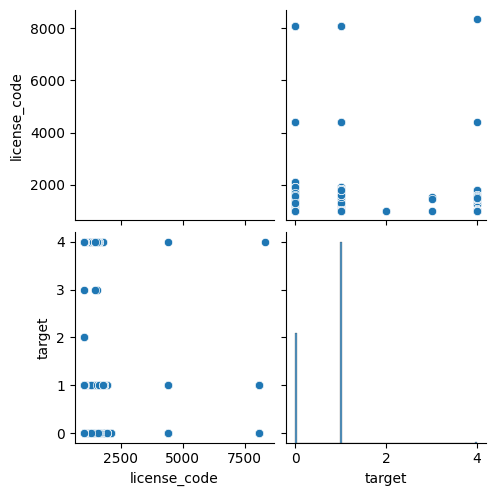

In [ ]:
# Create a pair plot of the two features
sns.pairplot(df[['license_code', 'target']])

# Show the plot
plt.show()

In [ ]:
df['application_type'].value_counts()

RENEW     61085
ISSUE     23398
C_LOC      1400
C_CAPA        7
C_EXPA        5
Name: application_type, dtype: int64

## Train / Test Data Preparation

In [ ]:
X = sampled_df[['latitude', 'longitude',
       'completion_to_start',
       'start_to_expiry', 'approval_to_issuance', 'completion_to_payment',
       'presence_of_enquiry_details',  'license_description_target_1',
       'state_target_1', 'city_target_1', 'license_description_target_2',
       'state_target_2', 'city_target_2', 'license_description_target_3',
       'state_target_3', 'city_target_3', 'license_description_target_4',
       'state_target_4', 'city_target_4', 'license_description_target_5',
       'state_target_5', 'city_target_5']]

y = sampled_df['target']

In [ ]:
X.isna().sum()

latitude                        14699
longitude                       14699
completion_to_start               111
start_to_expiry                    71
approval_to_issuance             2085
completion_to_payment             838
presence_of_enquiry_details         0
license_description_target_1        0
state_target_1                      0
city_target_1                      21
license_description_target_2        0
state_target_2                      0
city_target_2                      21
license_description_target_3        0
state_target_3                      0
city_target_3                      21
license_description_target_4        0
state_target_4                      0
city_target_4                      21
license_description_target_5        0
state_target_5                      0
city_target_5                      21
dtype: int64

In [ ]:
# mean imputation
X = X.fillna(X.mean())

In [ ]:
# Train/test preparation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

## Modeling

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

knn_model.fit((scaler.transform(X_train)),y_train)
scaler.fit(X_test)
y_pred = knn_model.predict(scaler.transform(X_test))

In [ ]:
# Metrics Performance
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       875
           1       0.85      0.90      0.87      1687
           2       0.84      0.55      0.67        38
           3       1.00      0.34      0.51        29
           4       0.36      0.48      0.41        67

    accuracy                           0.80      2696
   macro avg       0.76      0.59      0.63      2696
weighted avg       0.80      0.80      0.80      2696



In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.28      0.37       875
           1       0.69      0.91      0.78      1687
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        67

    accuracy                           0.66      2696
   macro avg       0.25      0.24      0.23      2696
weighted avg       0.61      0.66      0.61      2696



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Metrics Performance
print(confusion_matrix(y_test,y_pred))

[[ 244  626    2    3    0]
 [ 140 1538    8    1    0]
 [   0   38    0    0    0]
 [  29    0    0    0    0]
 [  32   35    0    0    0]]


In [ ]:
# Naive Bias
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
y_pred = nb_model.fit(X_train, y_train).predict(X_test)

In [ ]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.22      0.31       875
           1       0.91      0.86      0.88      1687
           2       1.00      1.00      1.00        38
           3       0.27      1.00      0.43        29
           4       0.09      0.85      0.17        67

    accuracy                           0.65      2696
   macro avg       0.56      0.78      0.56      2696
weighted avg       0.76      0.65      0.67      2696



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 189  149    0   66  471]
 [ 154 1446    0    4   83]
 [   0    0   38    0    0]
 [   0    0    0   29    0]
 [   3    0    0    7   57]]


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0)
y_pred = dt_model.fit(X_train, y_train).predict(X_test)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       875
           1       0.89      0.91      0.90      1687
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        29
           4       0.73      0.91      0.81        67

    accuracy                           0.86      2696
   macro avg       0.89      0.92      0.90      2696
weighted avg       0.86      0.86      0.86      2696



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 674  181    0    0   20]
 [ 157 1527    0    0    3]
 [   0    0   38    0    0]
 [   0    0    0   29    0]
 [   6    0    0    0   61]]


In [ ]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, dt_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

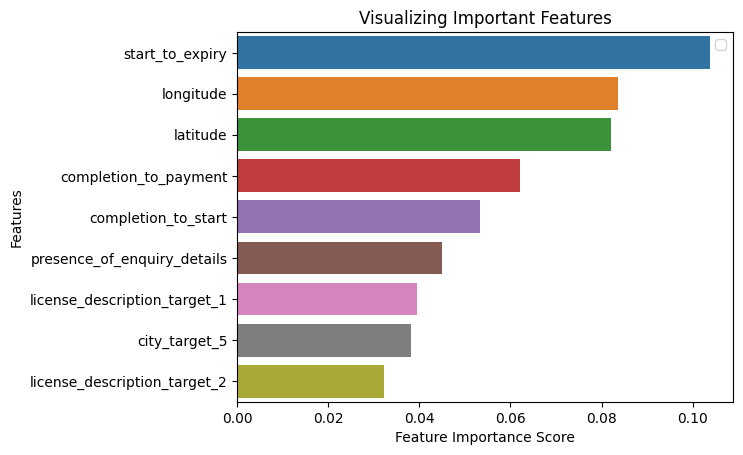

In [ ]:
import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Hyperparameter Tuning - Tree parameters
# 1. No. of trees
# 2. Depth of the trees
# 3. Min no. of samples in the leaf node
# 4. Max number of features
# 5. Split Criterion